# Post Process Data Exploration
## Notebook 3/7

## Gabriel del Valle
## 07/21/24
## NYC DATA SCIENCE ACADEMY

### For any questions about this project or to request full map videos or datasets, please feel free to reach out on Linkedin: 

   www.linkedin.com/in/gabriel-del-valle-147616152

   gabrielxdelvalle@gmail.com


 This python jupyter notebook is analyzing the data that was produced from an Automated Traffic Counts dataset from openNYC (2016-2019), filtered to focus on streets below 60th street in Manhattan. 

 The intervals of time that were unrecorded for each street in this dataset have been added as NA, so that there is a row with a time interval for each street per 15 minute interval 2016 - 2019. 

 While all months are available in the data and contain numerous rows, the majority of rows are concentrated in October, and thus it will be the focus of study.

## Analysis Plan:

## 1. Find the distribution of data and missing data

## 2. Create Descriptive Statistics

## 3. Explore Mapping Methods

## 4. Impute Missing Data

In [1]:
import pandas as pd
import numpy as np

In [49]:
import matplotlib.pyplot as plt
import missingno as msno
import matplotlib.dates as mdates

In [3]:
czone_October = pd.read_csv("czone_October.csv")

In [4]:
czone_notOctober = pd.read_csv("czone_notOctober.csv")

/var/folders/js/by2fcrxd7xs7tqhrrq5xncgw0000gn/T/ipykernel_46475/447776899.py:1: DtypeWarning: Columns (9,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  czone_notOctober = pd.read_csv("czone_notOctober01.csv")


## 0. Add a datetime format column

This dataset was made via a cloud computing service, Azure Synapse Notebook. It is easier to add things such as a datetime column or get the size of the datasets on a single machine running python.

In [5]:
czone_October['datetime'] = pd.to_datetime(czone_October[['year', 'month', 'day', 'hour', 'minute']])
czone_notOctober['datetime'] = pd.to_datetime(czone_notOctober[['year', 'month', 'day', 'hour', 'minute']])

## 1. Find the distribution of data and missing data

<Axes: >

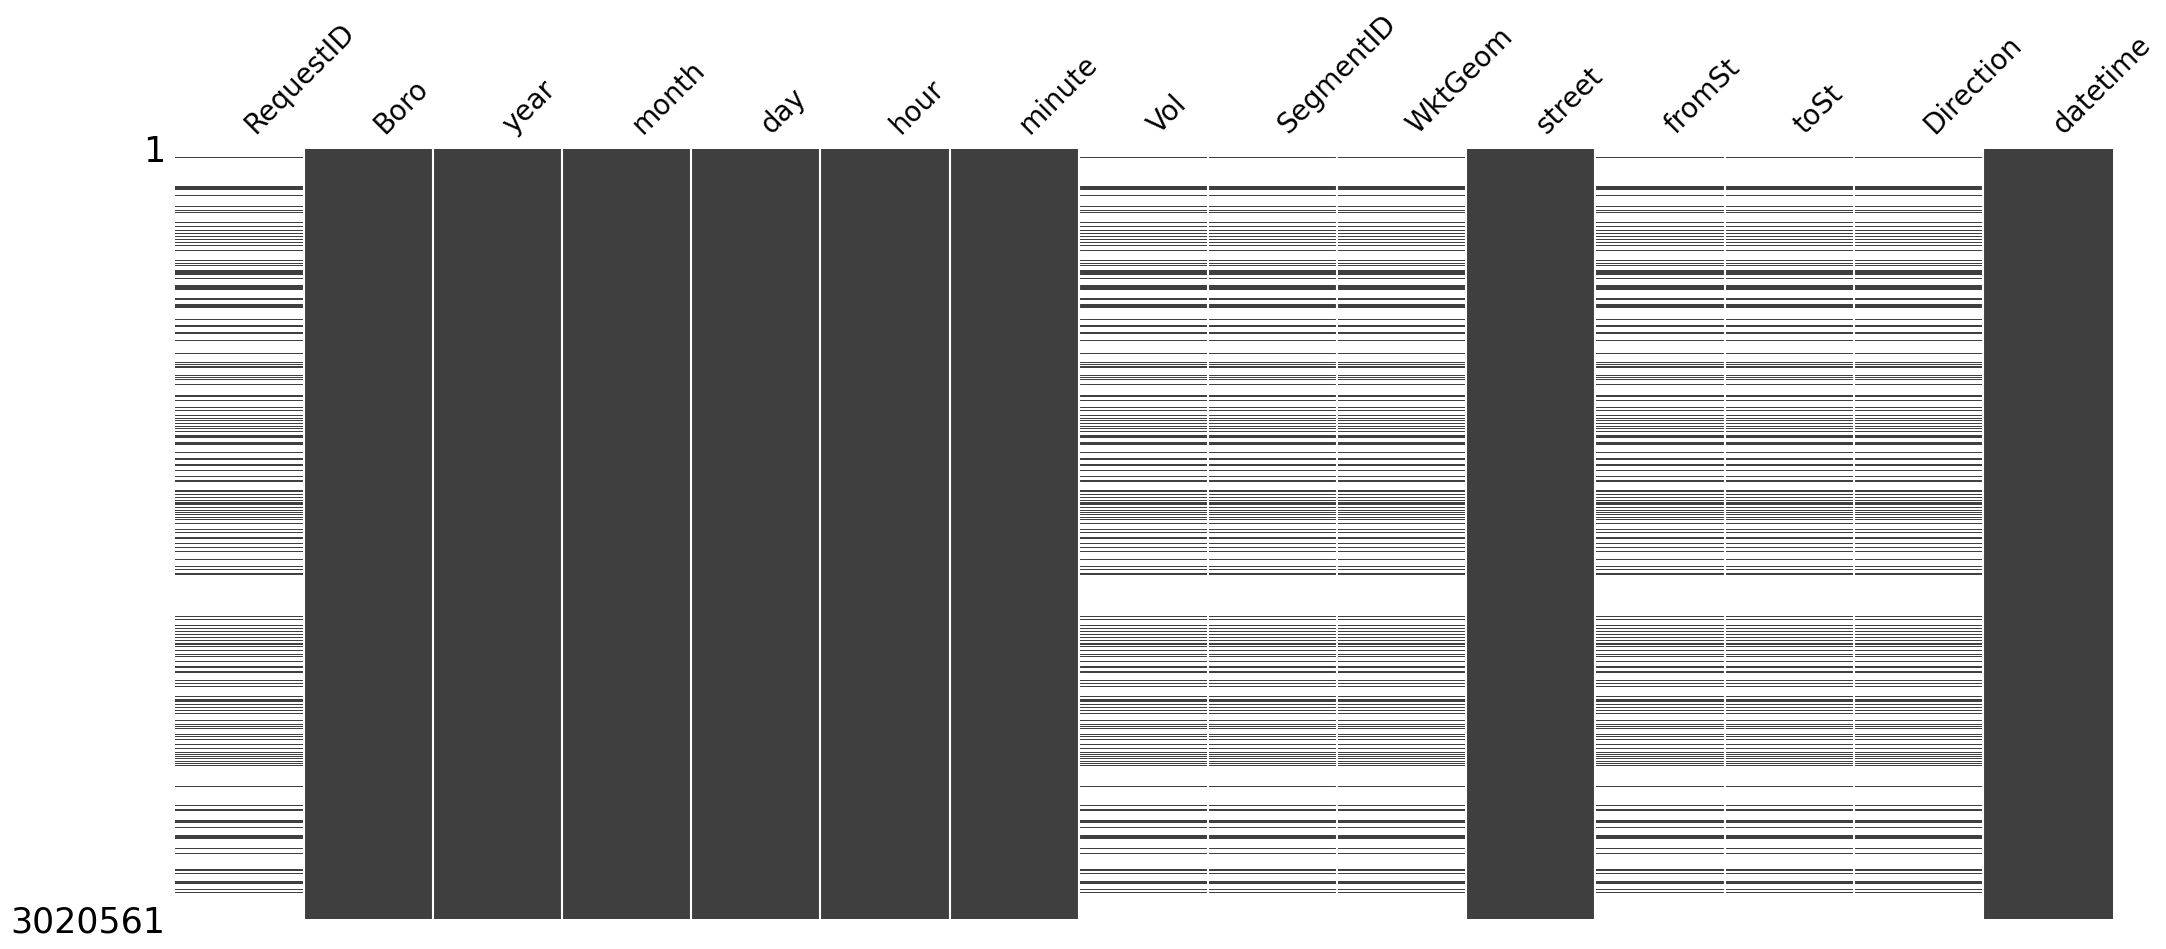

In [9]:
msno.matrix(czone_October, sparkline=False, fontsize=20)

<Axes: >

/Users/gabrieldelvalle/anaconda3/lib/python3.11/site-packages/matplotlib/image.py:180: UserWarning: Data with more than 2**24 rows cannot be accurately displayed. Downsampling to less than 2**24 rows before displaying. To remove this warning, manually downsample your data.
  warnings.warn(msg.format(n='2**24 rows'))


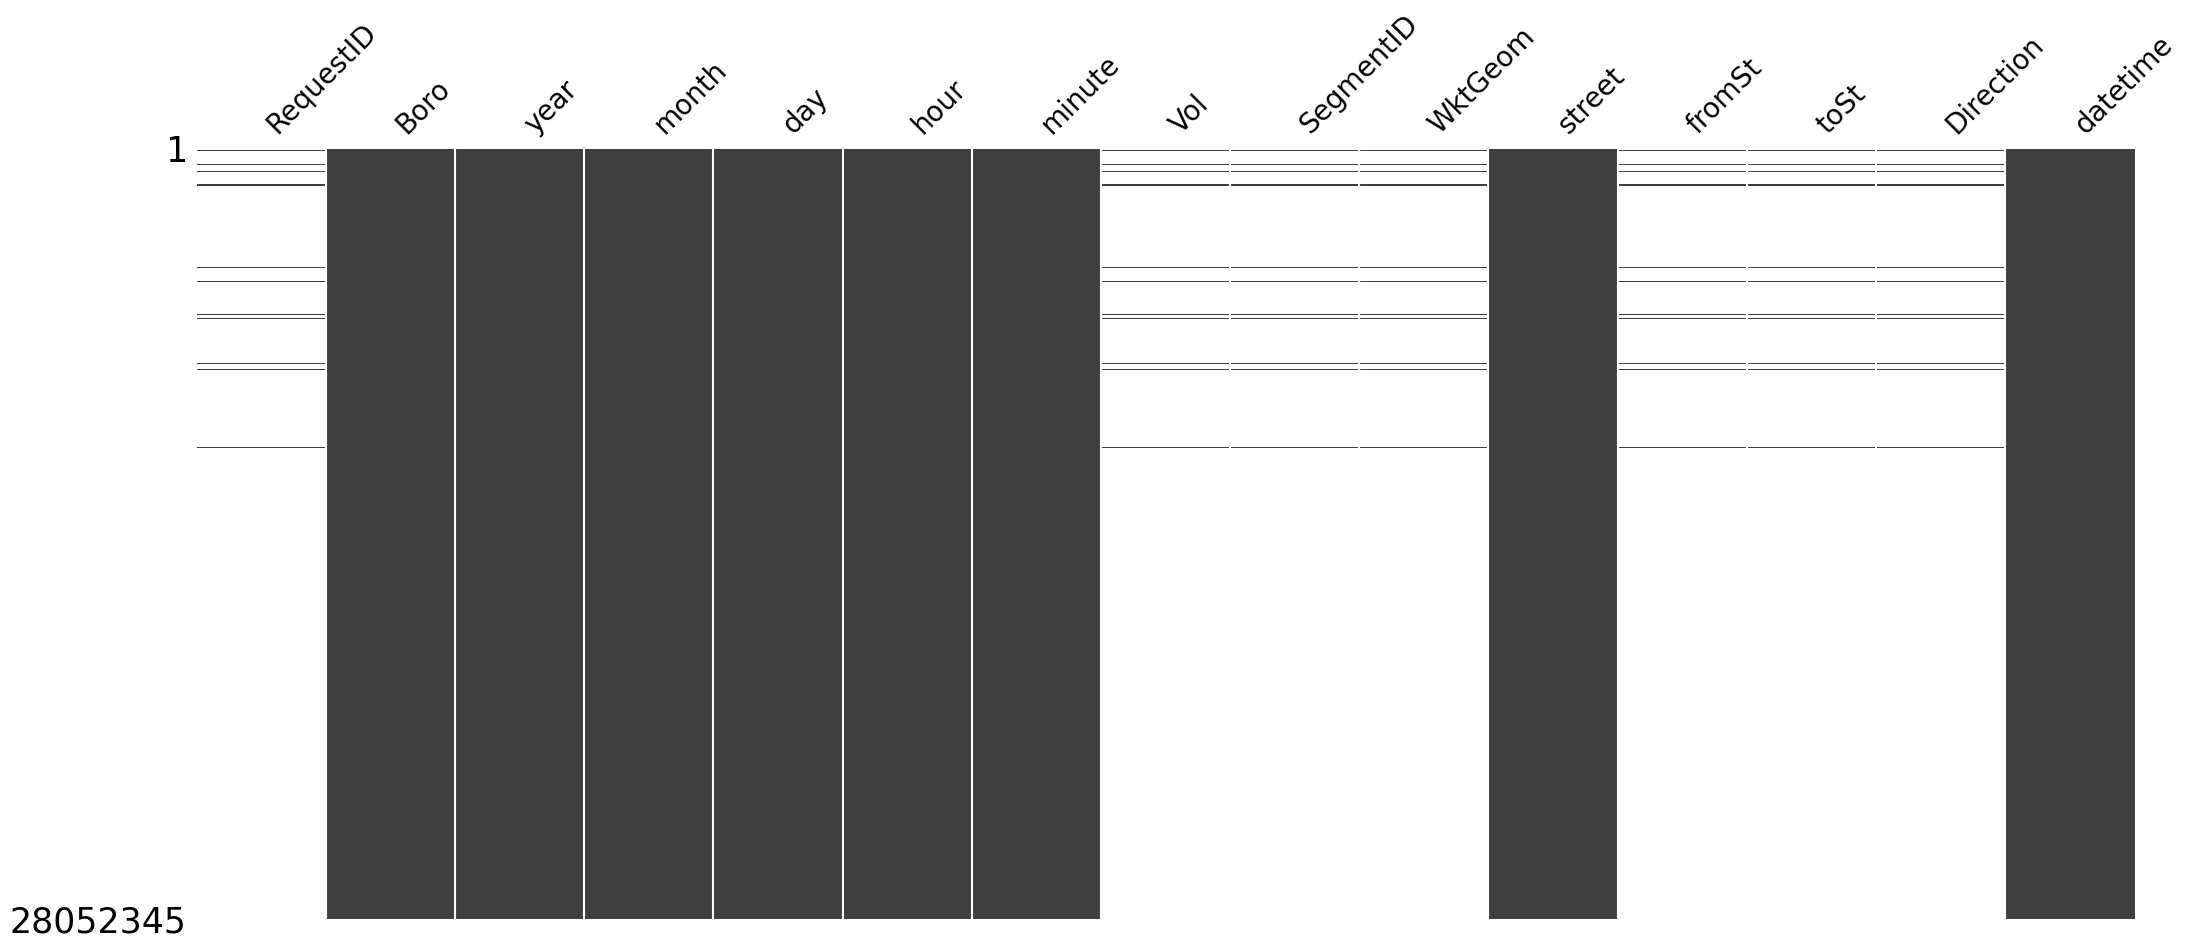

In [10]:
msno.matrix(czone_notOctober, sparkline=False, fontsize=20)

In [11]:
#Use Vol as an indicator of whether a row is NA,
#since it is present in all rows with exisiting data

noNA_October = czone_October.dropna(subset=['Vol'])
noNA_notOctober = czone_notOctober.dropna(subset=['Vol'])

In [12]:
print(len(czone_October))
print(len(noNA_October))

print(len(czone_October['street'].unique()))
print(len(noNA_October['street'].unique()))

3020561
714603
224
120


The above reveals that some streets have no data, and thus should be excluded for the moment for analysis and imputation. 

A future project could return to these streets without data and interpolate values from the streets around them.

In [13]:
#CPDT = Counts Per Date Time
czoneOctoberCPDT = noNA_October.groupby('datetime').size().reset_index()
czoneOctoberCPDT.columns = ['datetime', 'row_count']
czoneOctoberCPDT.set_index('datetime', inplace = True)

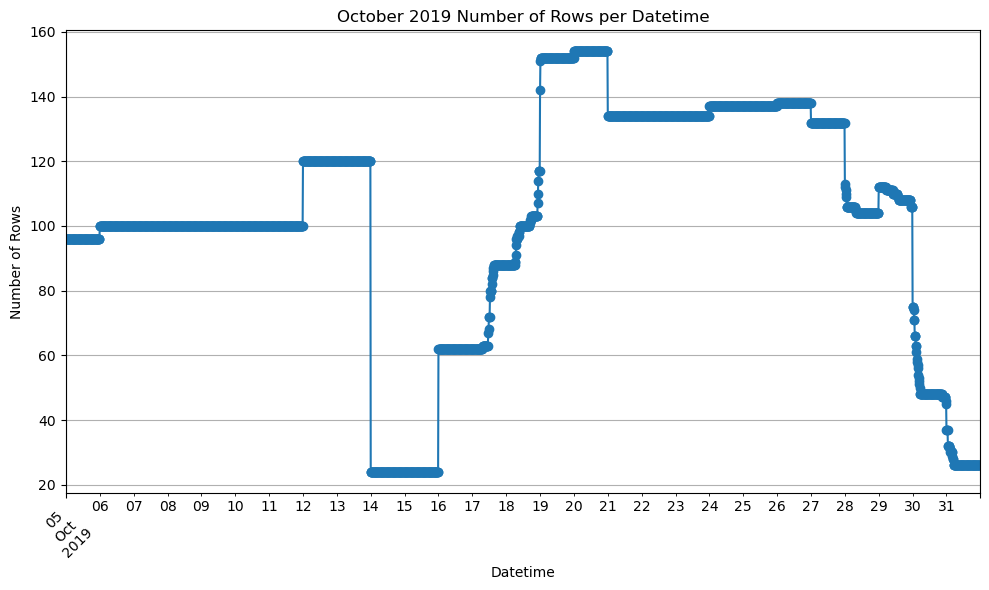

In [14]:
noNA_October19 = noNA_October[noNA_October['year'] == 2019]
CPDT_Oct19 = noNA_October19.groupby('datetime').size()

plt.figure(figsize=(10, 6))
CPDT_Oct19.plot(marker='o', linestyle='-')
plt.xlabel('Datetime')
plt.ylabel('Number of Rows')
plt.title('October 2019 Number of Rows per Datetime')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

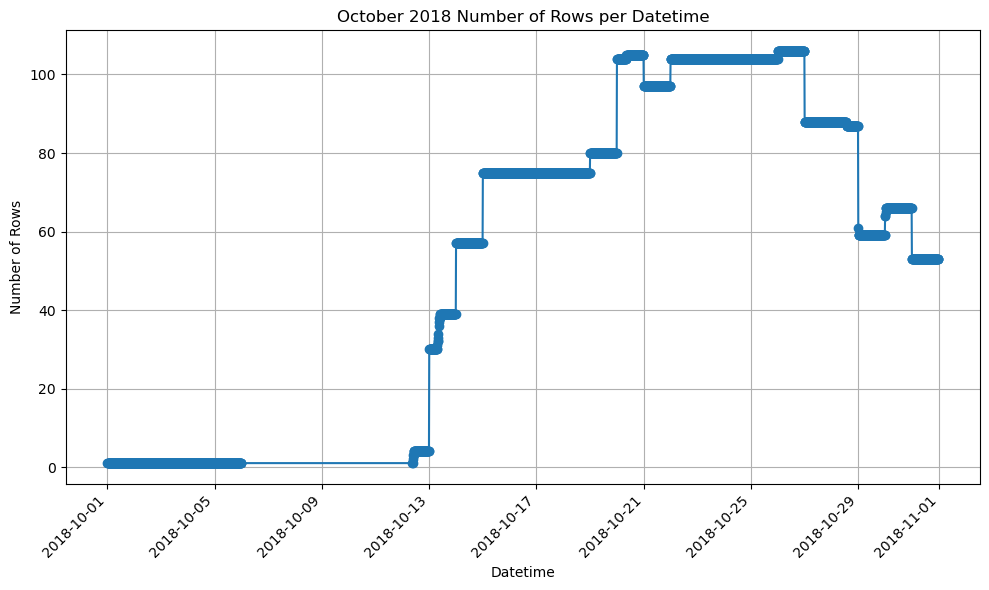

In [15]:
noNA_October18 = noNA_October[noNA_October['year'] == 2018]
CPDT_Oct18 = noNA_October18.groupby('datetime').size()

plt.figure(figsize=(10, 6))
CPDT_Oct18.plot(marker='o', linestyle='-')
plt.xlabel('Datetime')
plt.ylabel('Number of Rows')
plt.title('October 2018 Number of Rows per Datetime')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

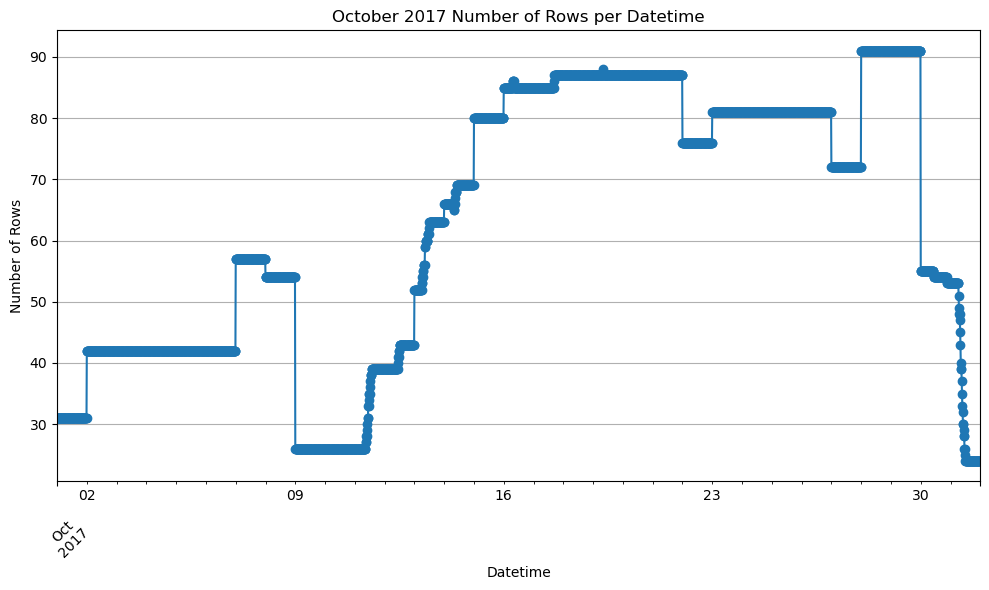

In [16]:
noNA_October17 = noNA_October[noNA_October['year'] == 2017]
CPDT_Oct17 = noNA_October17.groupby('datetime').size()

plt.figure(figsize=(10, 6))
CPDT_Oct17.plot(marker='o', linestyle='-')
plt.xlabel('Datetime')
plt.ylabel('Number of Rows')
plt.title('October 2017 Number of Rows per Datetime')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

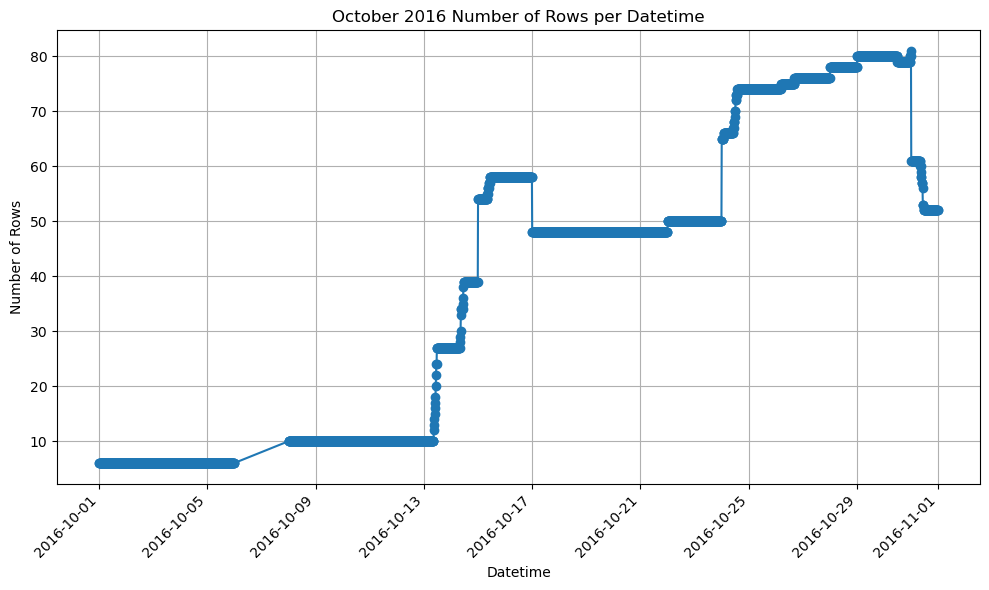

In [17]:
noNA_October16 = noNA_October[noNA_October['year'] == 2016]
CPDT_Oct16 = noNA_October16.groupby('datetime').size()

plt.figure(figsize=(10, 6))
CPDT_Oct16.plot(marker='o', linestyle='-')
plt.xlabel('Datetime')
plt.ylabel('Number of Rows')
plt.title('October 2016 Number of Rows per Datetime')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Note: 

When first approaching the dataset I did an in-depth analysis of different streets, comparing rows per date time to try and notice if there were any more large patterns as to where data was concentrated that could help hone in on questions the data was best suited to answer.

However, none of this comparison via rows per date time were as useful for understanding the data and its patterns as the animated maps that came later. The WktGeom maps I realized could be made towards the end of my analysis are especially effective at understanding which roads were focused on at which times and at which locations along those streets during the recording process.

For example, the WktGeom maps revealed something I could not discover from looking at charts and comparing ratios of data entries, because it was geographic information:

7 Avenue

2016-10-15 00:15 to 

2016-10-27 23:45

While most streets have just a single source of data recording along its entirety, 7 Avenue had 11 recording sights, each indicated by a WktGeom marker, tightly packed between Times Square and Penn Station, allowing for a high degree of traffic monitoring precision.

In [18]:
#Find number of missing rows per street in October

# Step 1: Count the total number of rows with missing values in the 'value' column
total_missing_October = czone_October['Vol'].isna().sum()

# Step 2: Group the DataFrame by the 'street' column and count the number of missing values in each group
OmpS = czone_October.groupby('street')['Vol'].apply(lambda x: x.isna().sum()).reset_index()
OmpS.columns = ['street', 'missing_count']


#AKA October_missing_per_street
OmpS

street  missing_count
0                 1 AVENUE           3405
1                10 AVENUE           9476
2                11 AVENUE          10304
3                12 AVENUE           6931
4                 2 AVENUE           2896
..                     ...            ...
219            WEST STREET          10580
220  WEST WASHINGTON PLACE          11408
221         WILLIAM STREET          11408
222    WILLIAMSBURG BRIDGE           5380
223           WORTH STREET          11408

[224 rows x 2 columns]

## 2. Create descriptive statistics

To summarize this data effectively with a single chart requires consideration of the following factors among which insightful patterns appear:

- Target data is Vol
- Vol ranges varies over different streets
- Vol per street varies over time

Graphing average volume per street per hour as a stacked bargraph allows us to visualize these core patterns, informing both how the city as a whole fluctuates, and how much individual streets contribute to this volume. 

In [19]:
#Create a tabel with street name, hour
#and the average volume per street, per hour

mean_volOctober = noNA_October.groupby(['street', 'hour'])['Vol'].mean().reset_index()


/var/folders/js/by2fcrxd7xs7tqhrrq5xncgw0000gn/T/ipykernel_46475/1472566638.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

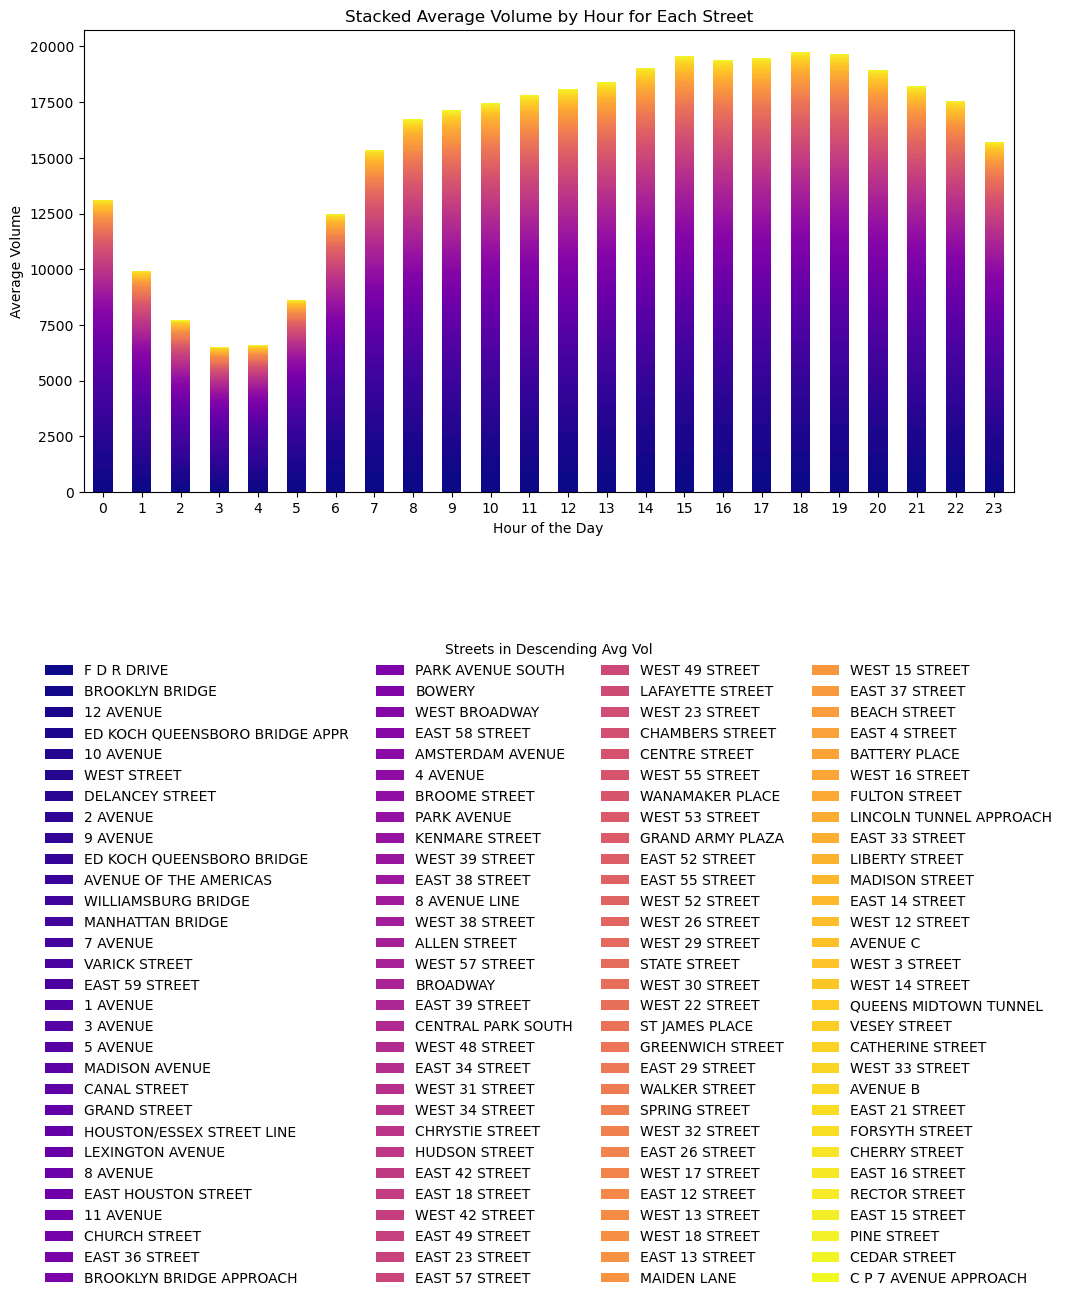

In [20]:
pivot_data = mean_volOctober.pivot_table(values='Vol', index='hour', columns='street', fill_value=0)

# Sort the pivot table's columns by the total volume for better visualization
sorted_columns = pivot_data.sum().sort_values(ascending=False).index
pivot_data = pivot_data[sorted_columns]

# Plot the stacked bar graph
plt.figure(figsize=(12, 6))
pivot_data.plot(kind='bar', stacked=True, colormap='plasma', figsize=(12, 6))
plt.xlabel('Hour of the Day')
plt.ylabel('Average Volume')
plt.title('Stacked Average Volume by Hour for Each Street')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Adjust legend to be below the chart
plt.legend(title='Streets in Descending Avg Vol', loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=4, frameon=False)

plt.tight_layout()
plt.show()

### Source Streets

With the Congestion Relief Zone of NYC 2024 at the heart of this data analysis, the sources of traffic which flow into the congestion zone (below 60th street Manhattan) are key to insights surrounding the zone, its targeted effect, and its potential impact.

Source streets are the streets from which one can enter the congestion zone. They include,
- Bridges
- Tunnels
- Avenues
- FDR Drive
- West Street

In [21]:
streets = czone_October['street'].unique()

bridges_tunnels = []


for street in streets:
    words = street.split(" ")
    if "BRIDGE" in words:
        bridges_tunnels.append(street)
    if "TUNNEL" in words:
        bridges_tunnels.append(street)
        
bridges_tunnels

['BROOKLYN BRIDGE APPROACH',
 'ED KOCH QUEENSBORO BRIDGE APPR',
 'BROOKLYN BRIDGE',
 'LINCOLN TUNNEL APPROACH',
 'MANHATTAN BRIDGE',
 'ED KOCH QUEENSBORO BRIDGE',
 'QUEENS MIDTOWN TUNNEL',
 'WILLIAMSBURG BRIDGE',
 'HUGH L CAREY TUNNEL EXIT']

In [22]:
czone_bridges = czone_October[czone_October['street'].isin(bridges_tunnels)]

avenues = czone_October[czone_October['street'].str.contains(r"AVENUE$", regex=True)]


#Remove NORTH END AVENUE since its not a real traffic sources
avenues = avenues[avenues['street'] != "NORTH END AVENUE"]


FDROctober = czone_October[czone_October['street'] == 'F D R DRIVE']

westStreet = czone_October[czone_October['street']== "WEST STREET"]

source_streets = pd.concat([czone_bridges, avenues, FDROctober, westStreet])

In [23]:
sources_hourlyVol = source_streets.groupby(['hour', 'street'])['Vol'].mean().unstack()

total_avg_volume = sources_hourlyVol.sum().sort_values(ascending=False)

# Reorder the DataFrame columns based on the total average volume
sources_hourlyVol = sources_hourlyVol[total_avg_volume.index]

/var/folders/js/by2fcrxd7xs7tqhrrq5xncgw0000gn/T/ipykernel_46475/1742584596.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1400x2000 with 0 Axes>

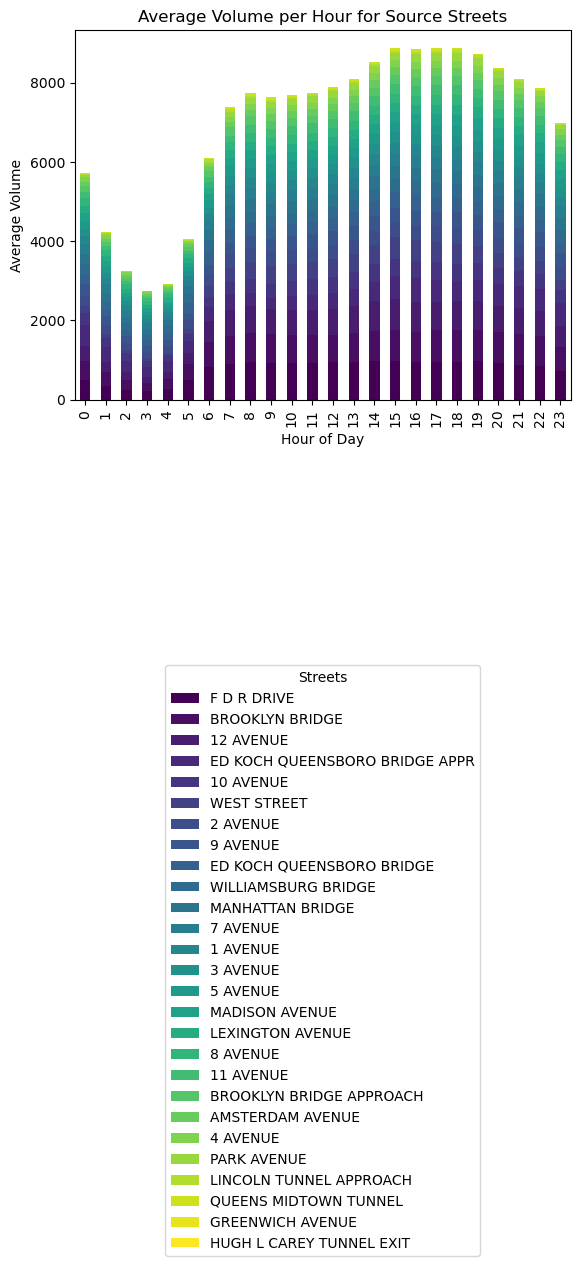

In [24]:
# Plotting the data
plt.figure(figsize=(14, 20))
sources_hourlyVol.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Average Volume per Hour for Source Streets')
plt.xlabel('Hour of Day')
plt.ylabel('Average Volume')
plt.legend(title='Streets', bbox_to_anchor=(0.5, -0.7), loc='upper center')
plt.tight_layout()
plt.show()

## Relative Measure - Congestion

While Volume is an important metric of city traffic, alone it is not descriptive of the qualitative experience of traffic. 100 cars on FDR DRIVE can mean traffic is moving quickly, while the same 100 cars on PINE STREET can mean a historic traffic jam. T

o compare the demand and performance for city infrastructure we need a relative measure, such as congestion, which compares the volume of a street to the street's maximum volume represented at any point in the data. Thus, congestion measures the current volume of a street against the streets own maximum capacity. 

congestion = vol / max_vol ## Per street per datetime

This allows all street's traffic quality to be rated on a scale of 0.0 to 1.0

In [25]:
maxStreetVol_Oct = noNA_October.groupby('street')['Vol'].max().reset_index()
maxStreetVol_Oct.columns = ['street', 'max_volume']
congestion_October = pd.merge(noNA_October, maxStreetVol_Oct, on='street')

congestion_October['congestion'] = congestion_October['Vol'] / congestion_October['max_volume']

In [26]:
congestion_October

RequestID       Boro  year  month  day  hour  minute    Vol  \
0         24511.0  Manhattan  2016     10    1     0       0   96.0   
1         24511.0  Manhattan  2016     10    1     0       0   92.0   
2         24511.0  Manhattan  2016     10    1     0       0   69.0   
3         24511.0  Manhattan  2016     10    1     0       0   78.0   
4         24511.0  Manhattan  2016     10    1     0       0   72.0   
...           ...        ...   ...    ...  ...   ...     ...    ...   
714598    29023.0  Manhattan  2018     10   12    21      45  331.0   
714599    29023.0  Manhattan  2018     10   12    22       0  339.0   
714600    29023.0  Manhattan  2018     10   12    22       0  242.0   
714601    29023.0  Manhattan  2018     10   12    22       0  303.0   
714602    29023.0  Manhattan  2018     10   12    22       0  162.0   

        SegmentID                                       WktGeom  \
0         32074.0     POINT (983870.5633736618 200686.54281152)   
1         32332.0  POINT (984386.5742381364 201430.53428025846)   
2         32337.0   POINT (984550.578402321 201338.51811265876)   
3         32303.0    POINT (984076.9089412034 200562.964096345)   
4         23572.0  POINT (983370.9307304942 199684.84195502696)   
...           ...                                           ...   
714598    36277.0   POINT (993256.5919971104 217326.2794700091)   
714599    36277.0   POINT (993256.5919971104 217326.2794700091)   
714600   158626.0  POINT (992781.3022381396 217590.22210737958)   
714601    36274.0    POINT (993699.4473096249 217079.667644479)   
714602   158736.0  POINT (992836.1705261773 217554.25812122528)   

                  street                 fromSt                   toSt  \
0       LAFAYETTE STREET  LEXINGTON AVENUE LINE  LEXINGTON AVENUE LINE   
1       LAFAYETTE STREET          HOWARD STREET           GRAND STREET   
2          CENTRE STREET          HOWARD STREET           GRAND STREET   
3          CENTRE STREET     NASSAU STREET LINE     NASSAU STREET LINE   
4       LAFAYETTE STREET  LEXINGTON AVENUE LINE  LEXINGTON AVENUE LINE   
...                  ...                    ...                    ...   
714598  LEXINGTON AVENUE         EAST 61 STREET           ASTORIA LINE   
714599  LEXINGTON AVENUE         EAST 61 STREET           ASTORIA LINE   
714600       PARK AVENUE           ASTORIA LINE         EAST 61 STREET   
714601          3 AVENUE           ASTORIA LINE         EAST 61 STREET   
714602       PARK AVENUE           ASTORIA LINE         EAST 61 STREET   

       Direction            datetime  max_volume  congestion  
0             SB 2016-10-01 00:00:00       356.0    0.269663  
1             SB 2016-10-01 00:00:00       356.0    0.258427  
2             NB 2016-10-01 00:00:00       227.0    0.303965  
3             NB 2016-10-01 00:00:00       227.0    0.343612  
4             SB 2016-10-01 00:00:00       356.0    0.202247  
...          ...                 ...         ...         ...  
714598        SB 2018-10-12 21:45:00       486.0    0.681070  
714599        SB 2018-10-12 22:00:00       486.0    0.697531  
714600        SB 2018-10-12 22:00:00       450.0    0.537778  
714601        NB 2018-10-12 22:00:00       677.0    0.447563  
714602        NB 2018-10-12 22:00:00       450.0    0.360000  

[714603 rows x 17 columns]

In [27]:
congestion_OctTotal = congestion_October.groupby('datetime')['congestion'].mean().reset_index()
congestion_OctTotal.columns = ['datetime', 'congestion_total']

Average Congestion across all streets per datetime is what is plotted in the following graphs.

This graph is mostly useful for visualizing the shape of the data. It shows:
- Changes in average volume across the day and night cycles
- Average range of congestion values
- Where there are holes in the recorded data across certain days
- When the data recordings shift to a different location (the range of the data changes after a cease in recordings)


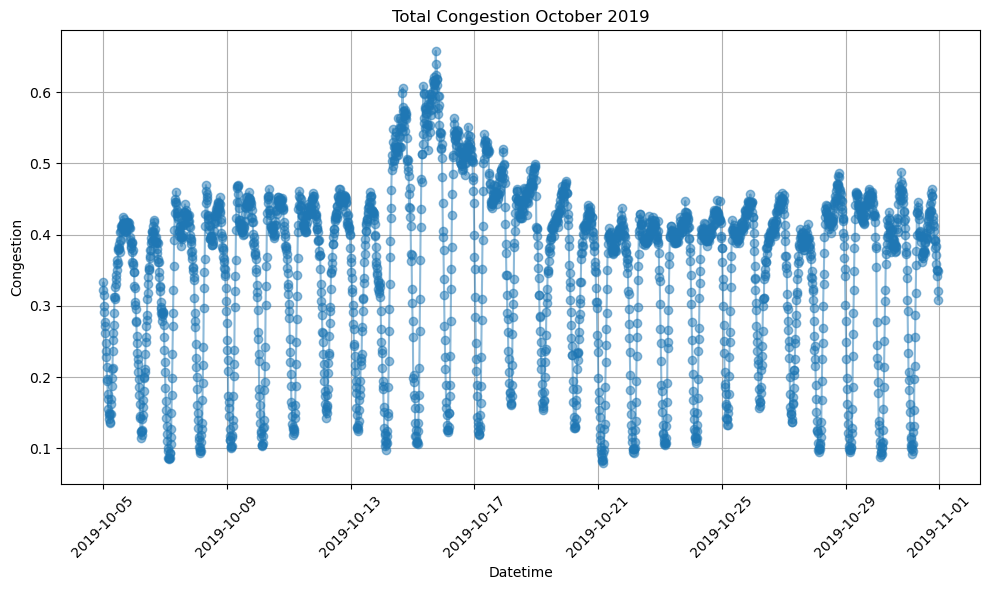

In [28]:
congestion_October19 = congestion_OctTotal[congestion_OctTotal['datetime'].dt.year == 2019]

# Plot congestion per datetime
plt.figure(figsize=(10, 6))
plt.plot(congestion_October19['datetime'], congestion_October19['congestion_total'], marker='o', linestyle='-', alpha=0.5)
plt.xlabel('Datetime')
plt.ylabel('Congestion')
plt.title('Total Congestion October 2019')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

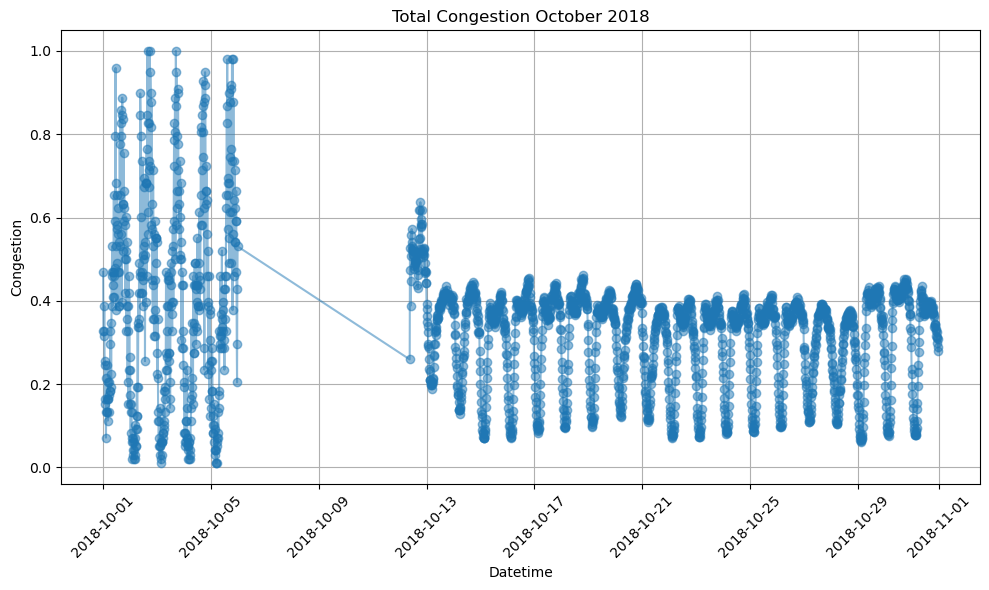

In [29]:
congestion_October18 = congestion_OctTotal[congestion_OctTotal['datetime'].dt.year == 2018]

# Plot congestion per datetime
plt.figure(figsize=(10, 6))
plt.plot(congestion_October18['datetime'], congestion_October18['congestion_total'], marker='o', linestyle='-', alpha=0.5)
plt.xlabel('Datetime')
plt.ylabel('Congestion')
plt.title('Total Congestion October 2018')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

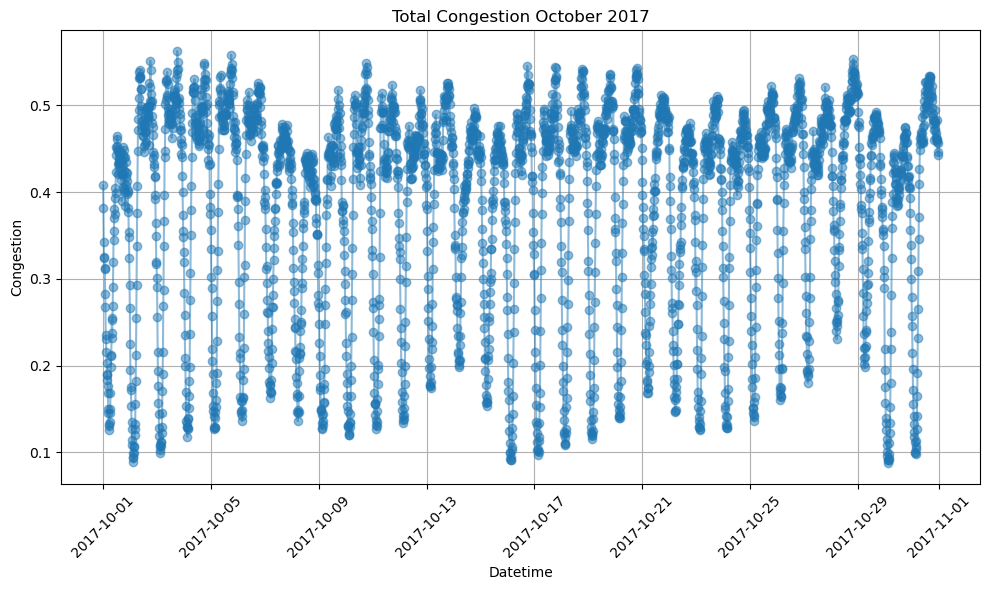

In [30]:
congestion_October17 = congestion_OctTotal[congestion_OctTotal['datetime'].dt.year == 2017]

# Plot congestion per datetime
plt.figure(figsize=(10, 6))
plt.plot(congestion_October17['datetime'], congestion_October17['congestion_total'], marker='o', linestyle='-', alpha=0.5)
plt.xlabel('Datetime')
plt.ylabel('Congestion')
plt.title('Total Congestion October 2017')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

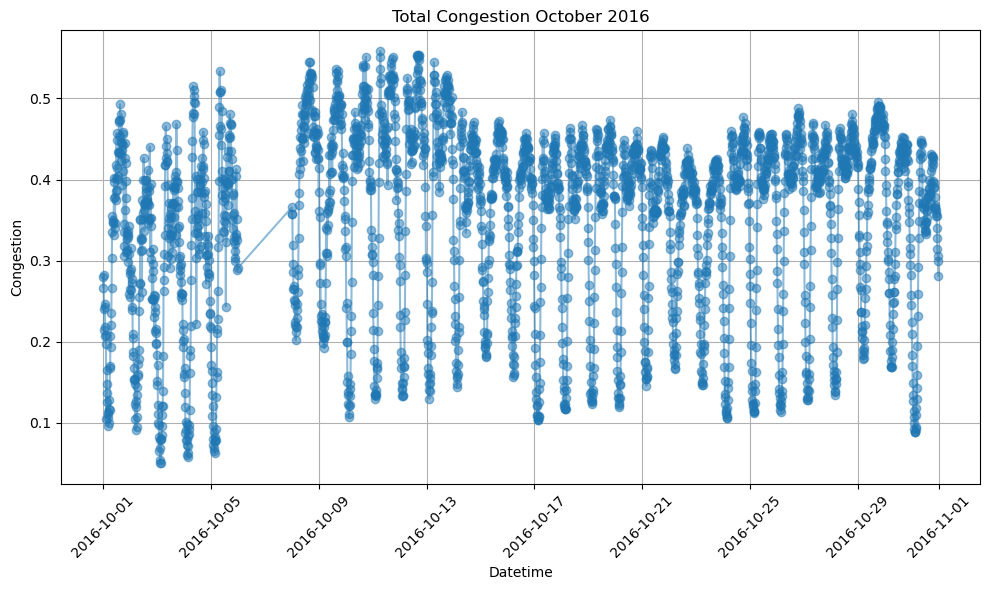

In [31]:
congestion_October16 = congestion_OctTotal[congestion_OctTotal['datetime'].dt.year == 2016]

# Plot congestion per datetime
plt.figure(figsize=(10, 6))
plt.plot(congestion_October16['datetime'], congestion_October16['congestion_total'], marker='o', linestyle='-', alpha=0.5)
plt.xlabel('Datetime')
plt.ylabel('Congestion')
plt.title('Total Congestion October 2016')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## 3. Mapping

Mapping is the greatest success of this project, using a custom script to animate the entirety of the volume data, creating as an end product many hours of video. 

The many experiments with various libraries that led to the success of the custom script were not included in this document, but was originally discovered in the sequence of the following work. The code with which to generate a single map frame is included in this notebook to reflect this, but the final methods which generate dozens of frames per second for the purpose of making animations are encoded in a separate notebook, Congestion Mapping.ipynb 

In [32]:
import geopandas as gpd

In [33]:
czone_json = gpd.read_file('czone_json.geojson')

In [79]:
base_map = gpd.read_file('base_map.geojson')

I had not previously worked with geojson files, but discovering the following property changed how I worked with it and made much possible:

When observing the dataset through a table view the 'geometry' column appears as a series of numeric coordinates, formatted as a multiline string. 

However, you can observe the geometry as a visual if you call on the contents of the geometry column individually, as in the example which follows.

Realizing that the streets in the geojson map were drawn one at a time when plotted as a map was the insight that allowed me to make a map with colors responsive to a street's data by mapping streets one at a time on a single plot. 

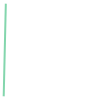

In [34]:
#Example
czone_json['geometry'][6]

The geojson dataset and the traffic volume data set were both aligned to have the same naming scheme and to both represent the Congestion Relief Zone at the start of this project. 

However, it is important to remember that neither dataset included all streets in the zone.

The following confirms that all the important streets represented by data in czone_October are present in the geojson dataset.

In [35]:
conOct_streetSet = set(congestion_October['street'].unique())
czone_jsonSet = set(czone_json['st_name'].unique())

streets_only_in_conOct = conOct_streetSet - czone_jsonSet
streets_only_in_conOct

{'8 AVENUE LINE',
 'AMSTERDAM AVENUE',
 'C P 7 AVENUE APPROACH',
 'ED KOCH QUEENSBORO BRIDGE APPR',
 'HOUSTON/ESSEX STREET LINE'}

In [36]:
streets_only_in_json = czone_jsonSet - conOct_streetSet
streets_only_in_json

{'7 AVENUE SOUTH',
 'AVENUE A',
 'AVENUE D',
 'BANK STREET',
 'BARCLAY STREET',
 'BATTERY PARK UNDERPASS',
 'BEAVER STREET',
 'BEDFORD STREET',
 'BIALYSTOKER PLACE',
 'BLEECKER STREET',
 'BROAD STREET',
 'CARMINE STREET',
 'CHARLES STREET',
 'CHATHAM SQUARE',
 'CHRISTOPHER STREET',
 'CLARKSON STREET',
 'CLINTON STREET',
 'COLUMBIA STREET',
 'COLUMBUS CIRCLE',
 'COMMERCE STREET',
 'CORNELIA STREET',
 'CROSBY STREET',
 'DIVISION STREET',
 'DOWNING STREET',
 'DOYERS STREET',
 'DUANE STREET',
 'EAST 10 STREET',
 'EAST 11 STREET',
 'EAST 20 STREET',
 'EAST 25 STREET',
 'EAST 35 STREET',
 'EAST 46 STREET',
 'EAST 47 STREET',
 'EAST 50 STREET',
 'EAST 53 STREET',
 'EAST 54 STREET',
 'EAST 56 STREET',
 'EAST 6 STREET',
 'EAST BROADWAY',
 'EDGAR STREET',
 'ESSEX STREET',
 'FDR DRIVE NB ENTRANCE E 34 STREET',
 'GREENE STREET',
 'GREENWICH AVENUE',
 'GROVE STREET',
 'HANOVER STREET',
 'HARRISON STREET',
 'HENRY STREET',
 'HOLLAND',
 'HORATIO STREET',
 'HUGH L CAREY',
 'JACKSON STREET',
 'KING STR

## Mappable data set : congsetion_streets

congestion_streets will be the dataset used for the majority of mappings, along with one similar to it with the addition of imputed data.

It prepares congestion_October for visualization by making each street an aggregate.

In the original dataset there are often multiple rows per street per date time, due to different segments of the street, or variance in qualities like toSt and fromSt creating additional rows for the same street at the same time.

Thus, to encapsulate the whole street at a time with a single value such as congestion, the streets need to be aggregated so that there is one row per street per time, reflecting the average of the disparate rows.

In [37]:
congestion_limited = congestion_October[['datetime', 'street', 'Vol', 'congestion', 'max_volume']]

# Group by datetime and street, and calculate average volume and congestion
congestion_streets = congestion_limited.groupby(['datetime', 'street']).agg({
    'Vol': 'mean',
    'congestion': 'mean',
    'max_volume': 'first'
}).reset_index()

In [38]:
from shapely.geometry import MultiLineString, LineString
import re

Using the following function:
- Insert a datetime interval
- Recieve a map of the congestion zone at that time, streets colored with their congestion value (green to yellow to red 0.0 to 1.0)

In [82]:
# Create a colormap ranging from green to red
cmap = plt.cm.get_cmap('RdYlGn')
geom_pattern = r"[-+]?\d*\.\d+|\d+"
base_map['color'] = 'lightgray' 

def plot_congestion(datetime):
    # Filter data for the specific datetime
    datetime_data = congestion_streets[congestion_streets['datetime'] == datetime]
    
    # Create a new figure
    fig, ax = plt.subplots()
                                    
    
    base_map.plot(ax=ax, color=base_map['color'], edgecolor='black', linewidth=0.5)
    
    # Iterate over each street segment
    for index, row in datetime_data.iterrows():
        street_name = row['street']
        congestion = row['congestion']
        
        # Get geometry of the street segment 
        street_geometries = list(czone_json[czone_json['st_name'] == street_name]['geometry'])

        for street_geometry in street_geometries:
        
            # Extract coordinates from geometry
            geometry_string = str(street_geometry)
            coordinates = re.findall(geom_pattern, geometry_string)
            coordinates = [float(coord) for coord in coordinates]

            # Split coordinates into pairs (longitude, latitude)
            coordinates_pairs = [(coordinates[i], coordinates[i + 1]) for i in range(0, len(coordinates), 2)]

        
            # Plot the line segment
            for i in range(len(coordinates_pairs) - 1):
                segment = coordinates_pairs[i:i+2]
                xs, ys = zip(*segment)  # Unzip the segment into x and y coordinates
                ax.plot(xs, ys, color=cmap(congestion), linewidth=1)

    

    ax.set_title(f'{datetime}')
    plt.axis('off')

    plt.show()

/var/folders/js/by2fcrxd7xs7tqhrrq5xncgw0000gn/T/ipykernel_46475/3542537744.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('RdYlGn')


<Figure size 1000x800 with 0 Axes>

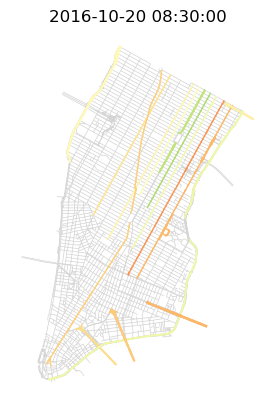

In [83]:
datetime_to_plot = congestion_streets['datetime'].iloc[12999]
plt.figure(figsize=(10, 8))
plot_congestion(datetime_to_plot)

While pretty to look at, it's important to remember that this style of map is only possible because of aggregation. 

What we are seeing is AVG Vol per street per date time, meaning the average along the street. A decent indication of its business, but one which flattens the peaks of where real world junctions and traffic patterns cause a slow down in particular locations.

For example, as a result of this aggregation, FDR DRIVE is never shown with a high value of congestion, because the individual segments which experience the highest volume are flattened by the long stretches of highway which see less build up. 

Particular locations and the extent of each road's data sources will be illustrated in maps to follow, plotting the WktGeom data present in czone_October rather than highlighting entire streets.

In [41]:
#Export the congsetion_streets dataset for further use in animated maps:

congestion_streets.to_csv('congestion_streets.csv', index=False)

## 4. Impute Missing Data

Standard approaches to imputing data such as: 

- Linear time series
- Last observation carried forward 
- K-Nearest neighbors

were mostly not applicable to imputing the missing volumes respectively due to:

- the nonlinear relationship of time and Vol

- the Volume being sensitive to time of day, and thus a previous observtion carried forward would disrupt the pattern if filling in another period of time

- Neighbors in the dataset may be too far apart to meaningfully reproduce the Vol versus time pattern, and there are meaningful missing chunks of time for each street that are not bookended by a neighbor to extrapolate with

Luckily the core pattern of avg Vol per time of day per street has already been described in the following graph. Using the following as a basis for the average Vol per street at any given hour is one of the most robust ways to produce data that reliably follows the dominant pattern in the dataset:

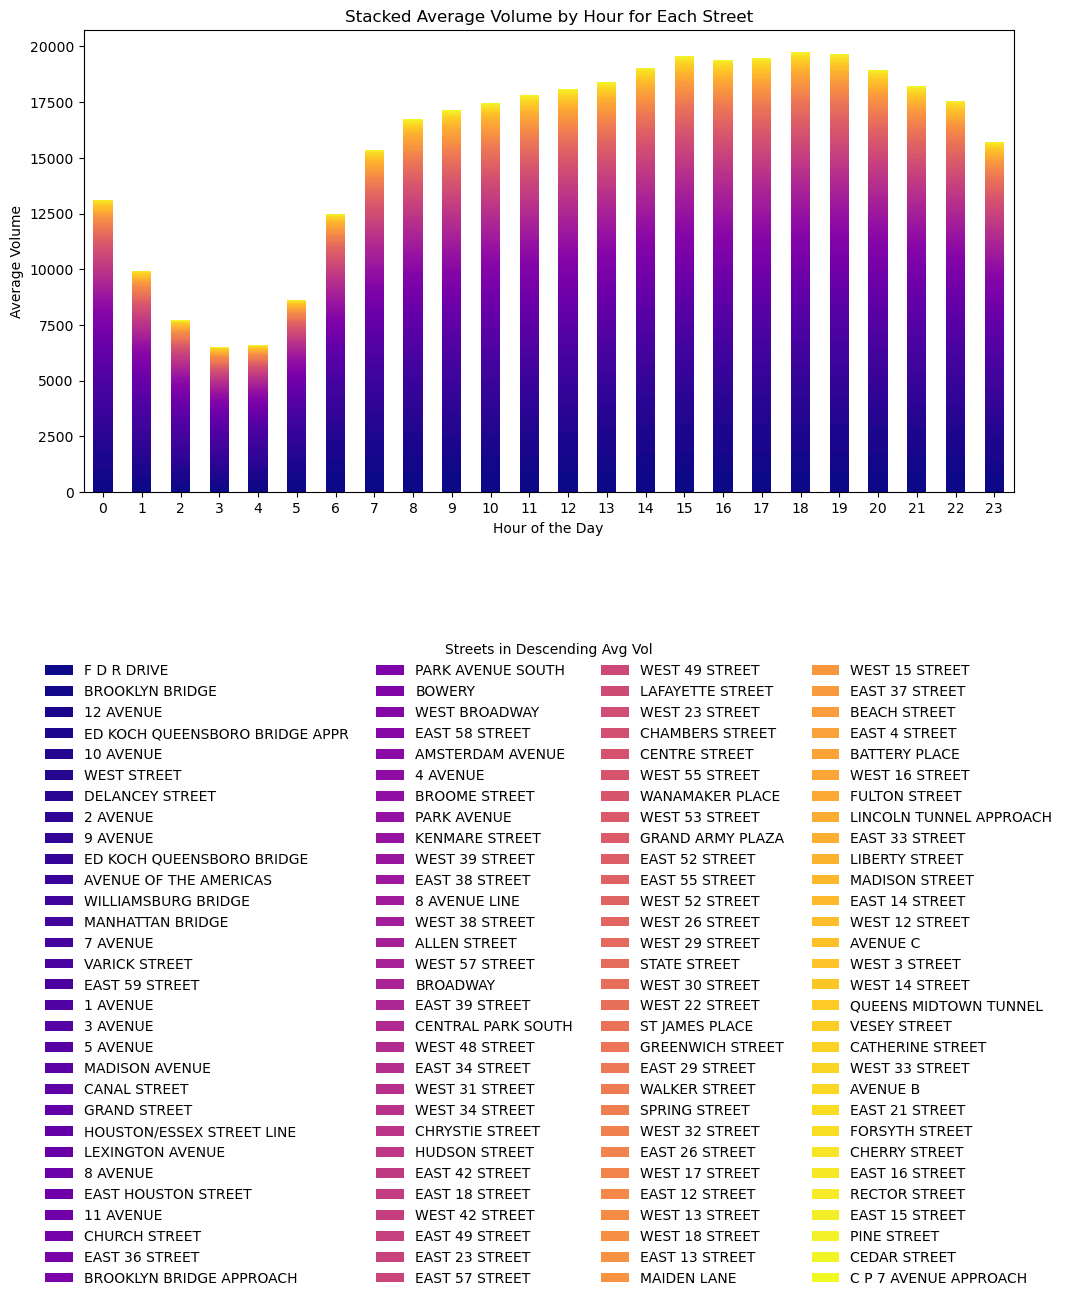

1. Recall that early it was found that 104 streets were found to contain no data. Account for this by excluding these streets from the new data frame for imputation.

We can't just use dropna() because we want to keep the NA rows for the streets that have data so we can fill them. So first we need to identify which rows have no data, which we can identify with the total sum of their Vol.

In [42]:
street_volSum = czone_October.groupby('street')['Vol'].sum().reset_index()

dud_streets = street_volSum[street_volSum['Vol'] <= 0]

dud_streets['street'].unique()

array(['6 AVENUE LINE', '7 AVENUE SOUTH', 'AVENUE A', 'AVENUE D',
       'BANK STREET', 'BARCLAY STREET', 'BEAVER STREET', 'BEDFORD STREET',
       'BIALYSTOKER PLACE', 'BLEECKER STREET', 'BROAD STREET',
       'CARMINE STREET', 'CHARLES STREET', 'CHATHAM SQUARE',
       'CHRISTOPHER STREET', 'CLARKSON STREET', 'CLINTON STREET',
       'COLUMBIA STREET', 'COLUMBUS CIRCLE', 'COMMERCE STREET',
       'CORNELIA STREET', 'CROSBY STREET', 'DIVISION STREET',
       'DOWNING STREET', 'DOYERS STREET', 'DUANE STREET',
       'E HOUSTON STREET', 'EAST 10 STREET', 'EAST 11 STREET',
       'EAST 20 STREET', 'EAST 25 STREET', 'EAST 35 STREET',
       'EAST 46 STREET', 'EAST 47 STREET', 'EAST 50 STREET',
       'EAST 53 STREET', 'EAST 54 STREET', 'EAST 56 STREET',
       'EAST 6 STREET', 'EAST BROADWAY', 'EDGAR STREET', 'ESSEX STREET',
       'FDR DRIVE EXIT 7 NORTHBOUND', 'FDR DRIVE EXIT 7 SOUTHBOUND',
       'FDR DRIVE NB ENTRANCE E 34 STREET', 'GREENE STREET',
       'GREENWICH AVENUE', 'GROVE ST

Now that the dud streets have been identified they can be removed in the dataframe that will hold the imputed data

2. Create a copy of the original dataframe czone_October and add a column which indicates if the row is Original, creating a way to distinguish imputed data later on:


In [43]:
impute_October = czone_October[~czone_October['street'].isin(dud_streets['street'].unique())].copy()


impute_October['Original'] = False

for idx, row in impute_October.iterrows():
    if pd.notna(row['Vol']):
        impute_October.loc[idx, 'Original'] = True

3. Impute the mean Vol per street per hour, using values in mean_volOctober

In [44]:


for idx, row in impute_October.iterrows():
    if row['Original'] == False:
        
        vol = mean_volOctober[(mean_volOctober['street'] == row['street']) & (mean_volOctober['hour'] == row['hour'])]['Vol']
        impute_October.loc[idx, 'Vol'] = vol.iloc[0]


4. Visualize the contrast between the original data and the imputed data to evaluate the effectiveness of the fill pattern

In [45]:
original_czone = impute_October[impute_October['Original'] == True]
impute_czone = impute_October[impute_October['Original'] == False]

In [46]:
original_czone16 = original_czone[original_czone['year'] == 2016]
impute_czone16 = impute_czone[impute_czone['year'] == 2016]


In [53]:
original_czone16 = original_czone16.set_index('datetime')
impute_czone16 = impute_czone16.set_index('datetime')

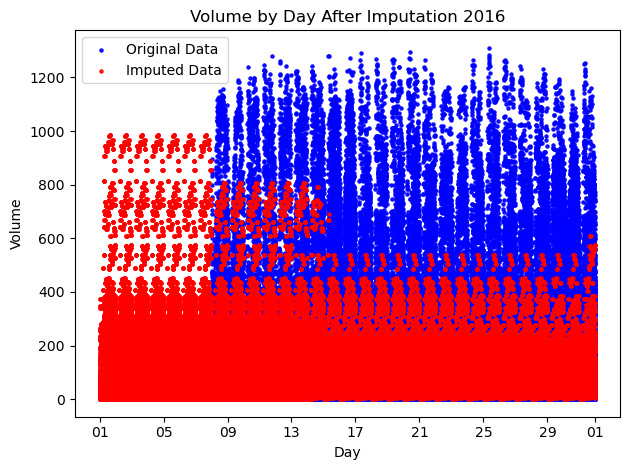

In [54]:
# Plot original data in one color
plt.scatter(original_czone16.index, original_czone16['Vol'], color='blue', label='Original Data', s=5, alpha =0.9)  # 's' is the size of the points

# Plot imputed data in another color
plt.scatter(impute_czone16.index, impute_czone16['Vol'], color='red', label='Imputed Data', s=5, alpha =0.9)


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))

plt.title('Volume by Day After Imputation 2016')
plt.xlabel('Day')
plt.ylabel('Volume')
plt.legend()
plt.tight_layout()
plt.show()

The above is a good first look into how the imputed data was distributed, but to see what holes it filled in the data we need to reverse the layering of the graph. (Reducing alpha of the blue layer also helps).

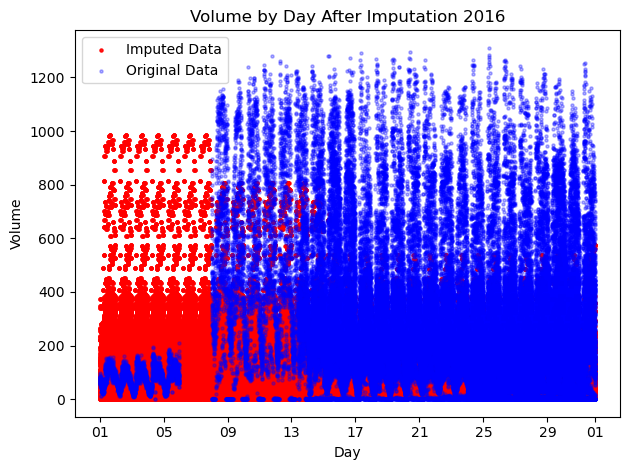

In [75]:
# Plot imputed data in another color
plt.scatter(impute_czone16.index, impute_czone16['Vol'], color='red', label='Imputed Data', s=5, alpha =0.9)


# Plot original data in one color
plt.scatter(original_czone16.index, original_czone16['Vol'], color='blue', label='Original Data', s=5, alpha =0.3)  # 's' is the size of the points


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))

plt.title('Volume by Day After Imputation 2016')
plt.xlabel('Day')
plt.ylabel('Volume')
plt.legend()
plt.tight_layout()
plt.show()

Now we can see where holes were filled in the database. Next we can represent the imputed data further by showing which datapoints correspond to which streets:

In [61]:
avvol_imputed = impute_October.copy()
avvol_imputed['avg_vol'] = avvol_imputed.groupby('street')['Vol'].transform('mean')
avvol16 = avvol_imputed[avvol_imputed['year']== 2016]
avvol16 = avvol16.sort_values(by = ['avg_vol'], ascending = False)

In [62]:
avvol16 = avvol16.set_index('datetime')

/var/folders/js/by2fcrxd7xs7tqhrrq5xncgw0000gn/T/ipykernel_46475/2276824751.py:31: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


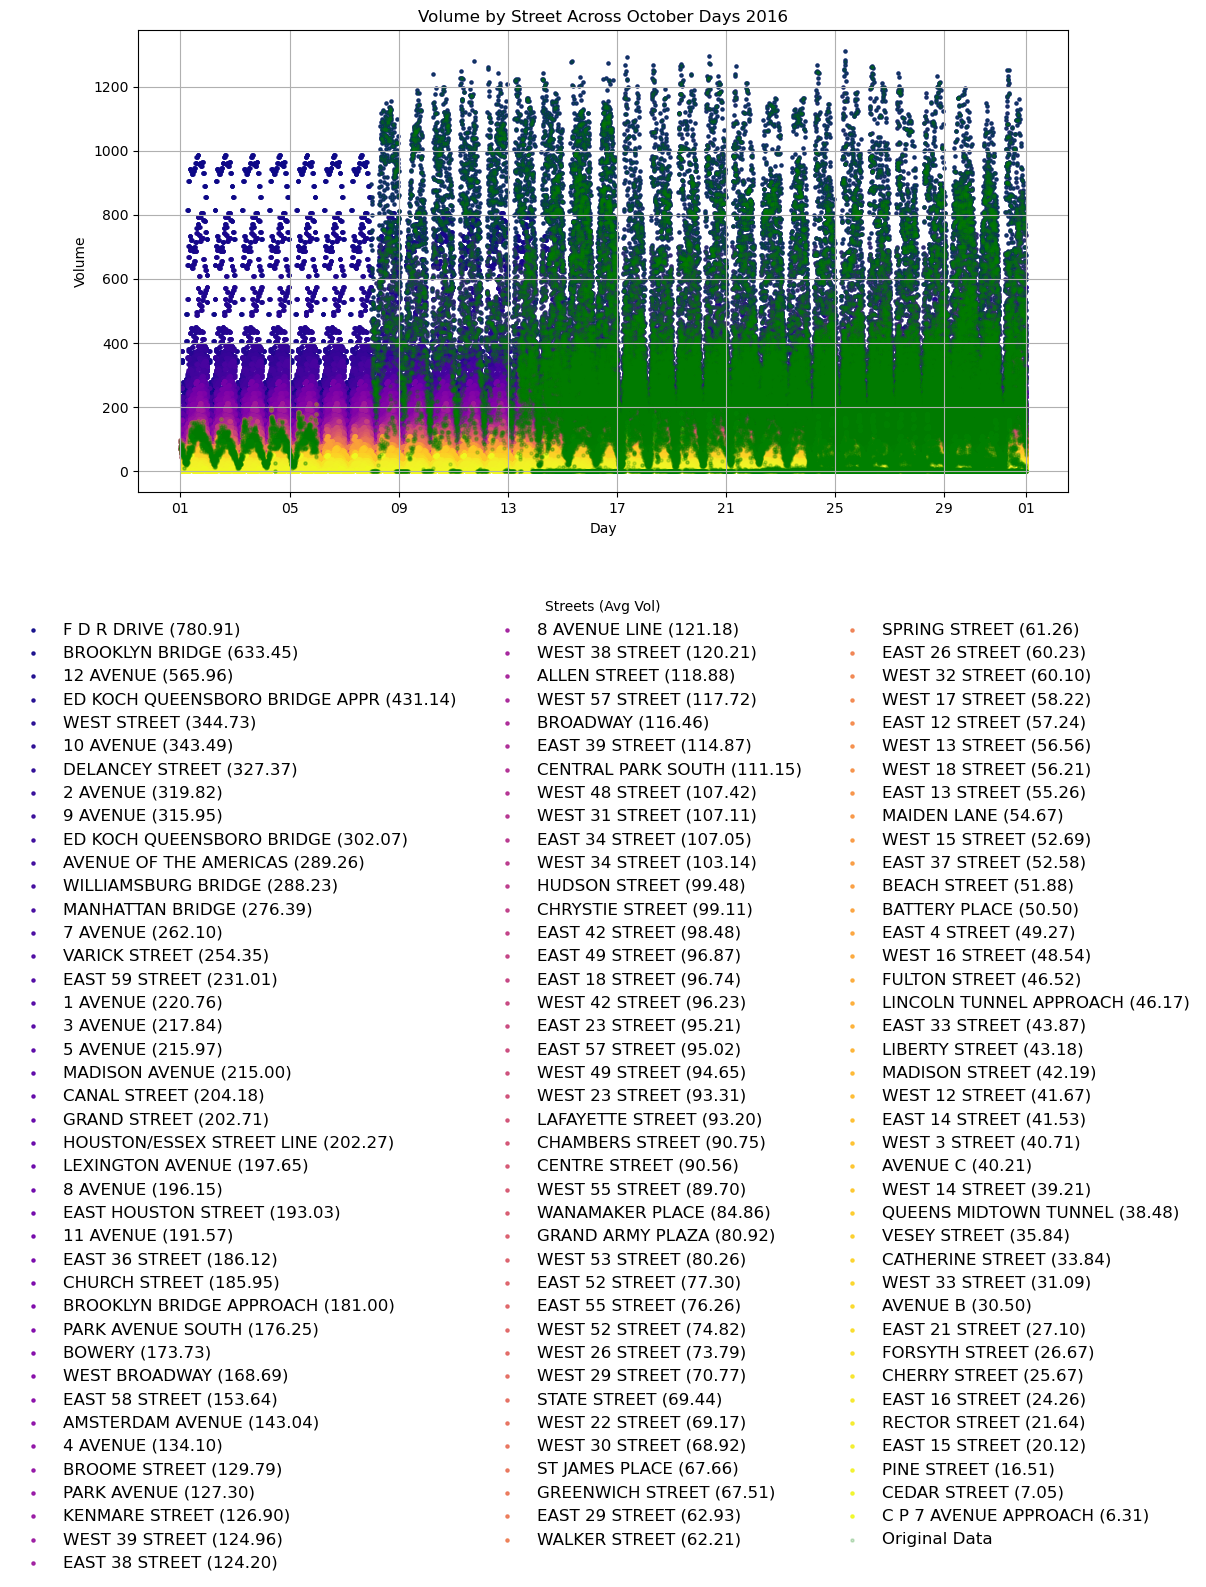

In [70]:
avvol16_streets = avvol16['street'].unique()
avvol16_colors = plt.cm.plasma(np.linspace(0, 1, len(avvol16_streets)))

# Prepare the plot
plt.figure(figsize=(12, 6))



for street, color in zip(avvol16_streets, avvol16_colors):
    # Filter data for each street
    street_data = avvol16[avvol16['street'] == street]
    plt.scatter(street_data.index, street_data['Vol'], color=color, label=f'{street} ({street_data["avg_vol"].iloc[0]:.2f})', s=5, alpha =0.9)
    

plt.scatter(original_czone16.index, original_czone16['Vol'], color='green', label='Original Data', s=5, alpha =0.2)
#plt.scatter(SO2016.index, SO2016['Vol'], color='green', label='Original Data', s=15, alpha =0.9)    
    
# Set date format on x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))



plt.title('Volume by Street Across October Days 2016')
plt.xlabel('Day')
plt.ylabel('Volume')
plt.grid(True)

# Adjust legend to be below the chart
plt.legend(title='Streets (Avg Vol)', loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3, frameon=False, fontsize='large')

plt.tight_layout()
plt.show()

In this graph, green is the original data and once again it is layered over the imputed data to show where the imputed data filled gaps.


As a means to check the results of the imputed data, we can also use it in a map. This leads well into the next notebook, where the focus will be producing animated maps. 

In [76]:
#Pepare the mapable dataset

maxStreetVol_Imp = impute_October.groupby('street')['Vol'].max().reset_index()
maxStreetVol_Imp.columns = ['street', 'max_volume']
congestion_impute = pd.merge(impute_October, maxStreetVol_Imp, on='street')

congestion_impute['congestion'] = congestion_impute['Vol'] / congestion_impute['max_volume']


congestion_imp_limited = congestion_impute[['datetime', 'street', 'Vol', 'congestion', 'max_volume']]

# Group by datetime and street, and calculate average volume and congestion
congestion_ImpStreets = congestion_imp_limited.groupby(['datetime', 'street']).agg({
    'Vol': 'mean',
    'congestion': 'mean',
    'max_volume': 'first'
}).reset_index()

In [102]:
cmap = plt.cm.get_cmap('RdYlGn')
geom_pattern = r"[-+]?\d*\.\d+|\d+"
base_map['color'] = 'gray' 

def plot_impute_congestion(datetime):
    # Filter data for the specific datetime
    datetime_data = congestion_ImpStreets[congestion_ImpStreets['datetime'] == datetime]
    
    # Create a new figure
    fig, ax = plt.subplots(figsize=(50, 40))
                                    
    base_map.plot(ax=ax, color=base_map['color'], edgecolor='black', linewidth=2.5)
    
    # Iterate over each street segment
    for index, row in datetime_data.iterrows():
        street_name = row['street']
        congestion = row['congestion']
        
        # Get geometry of the street segment 
        street_geometries = list(czone_json[czone_json['st_name'] == street_name]['geometry'])

        for street_geometry in street_geometries:
        
            # Extract coordinates from geometry
            geometry_string = str(street_geometry)
            coordinates = re.findall(geom_pattern, geometry_string)
            coordinates = [float(coord) for coord in coordinates]

            # Split coordinates into pairs (longitude, latitude)
            coordinates_pairs = [(coordinates[i], coordinates[i + 1]) for i in range(0, len(coordinates), 2)]

        
            # Plot the line segment
            for i in range(len(coordinates_pairs) - 1):
                segment = coordinates_pairs[i:i+2]
                xs, ys = zip(*segment)  # Unzip the segment into x and y coordinates
                ax.plot(xs, ys, color=cmap(congestion), linewidth=5)

    

    ax.set_title(f'{datetime}', fontsize=80)
    plt.axis('off')

    plt.show()

/var/folders/js/by2fcrxd7xs7tqhrrq5xncgw0000gn/T/ipykernel_46475/374272067.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('RdYlGn')


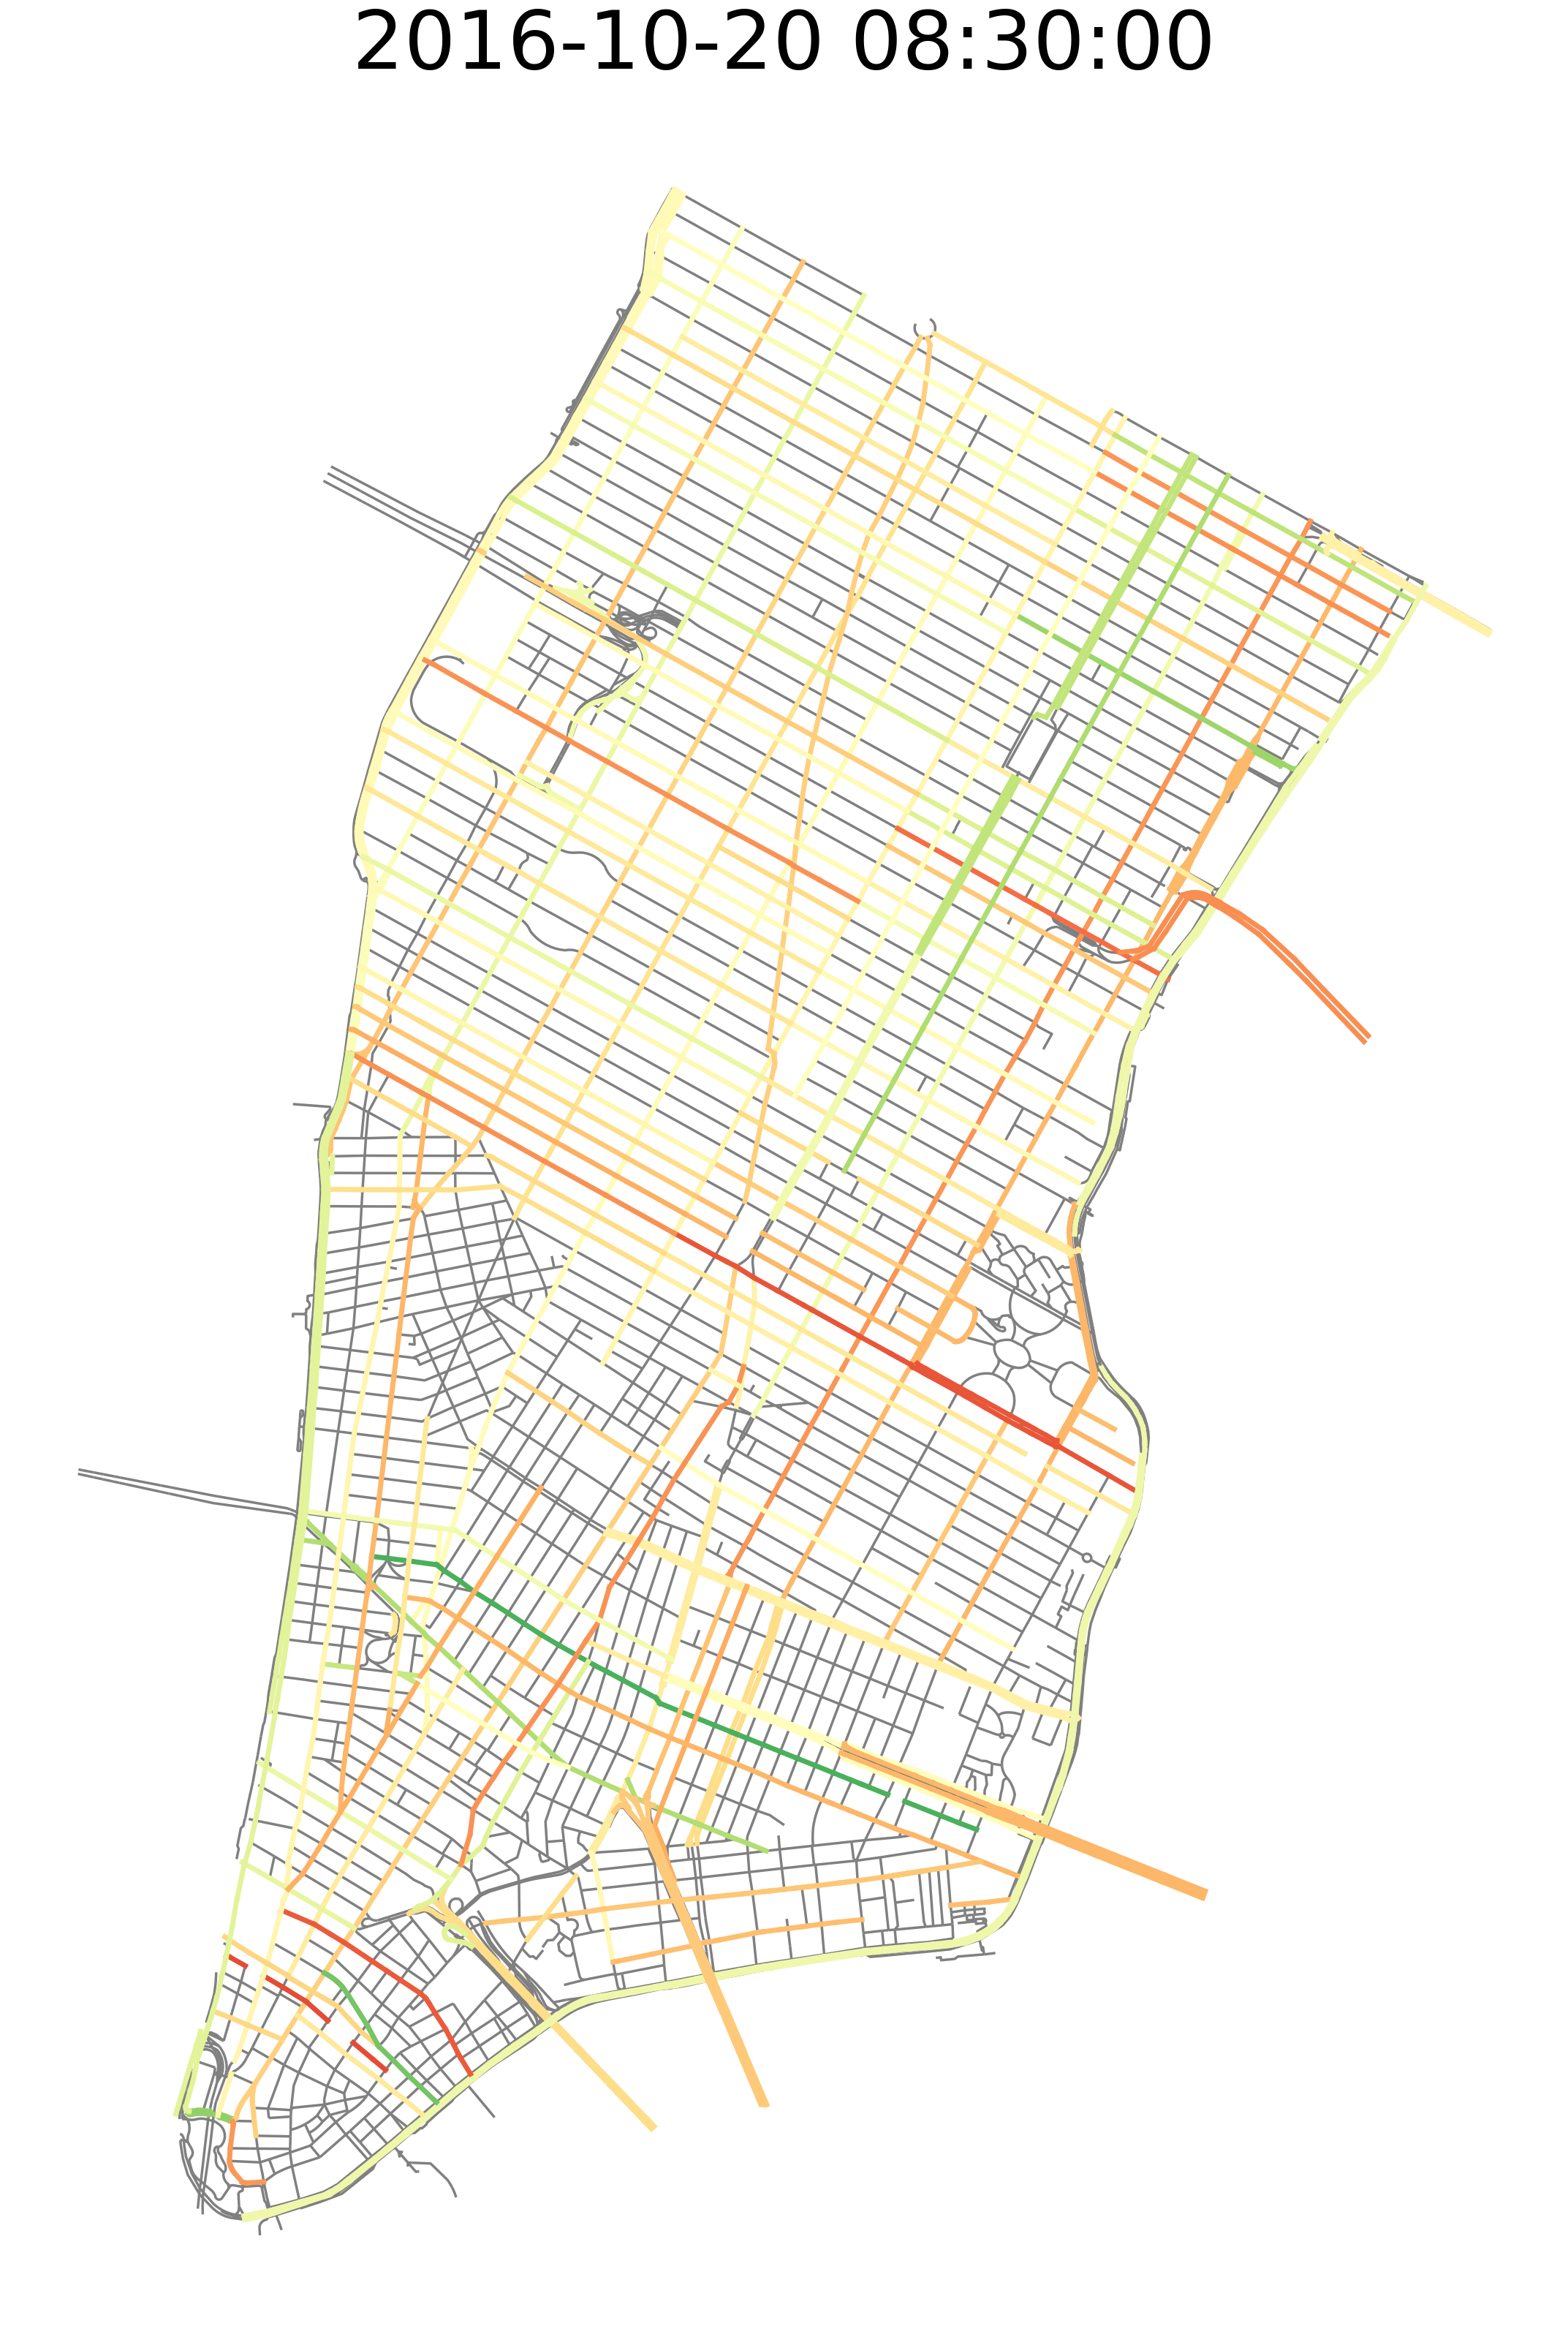

In [103]:
plot_impute_congestion(datetime_to_plot)

In this output what we are seeing are all streets in the dataset represented in each datetime frame.

To conclude, export the imputed data for further use in mapping.

In [89]:
congestion_ImpStreets.to_csv('imputed_congestion.csv', index=False)

In [90]:
impute_October.to_csv('impute_October.csv', index= False)